In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
import joblib

In [5]:
df=pd.read_csv(r'C:/Users/anand/Downloads/emotion_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Emotion     34792 non-null  object
 1   Text        34792 non-null  object
 2   Clean_Text  34326 non-null  object
dtypes: object(3)
memory usage: 815.6+ KB


In [6]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,NaN
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

C:\Users\anand\AppData\Local\Temp\ipykernel_21908\2023394900.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette=['#FF5733', '#33FF57', '#3380FF', '#FF33A1', '#FFD433', '#8333FF', '#33FFF5', '#8B4513'])


<Axes: xlabel='Emotion', ylabel='count'>

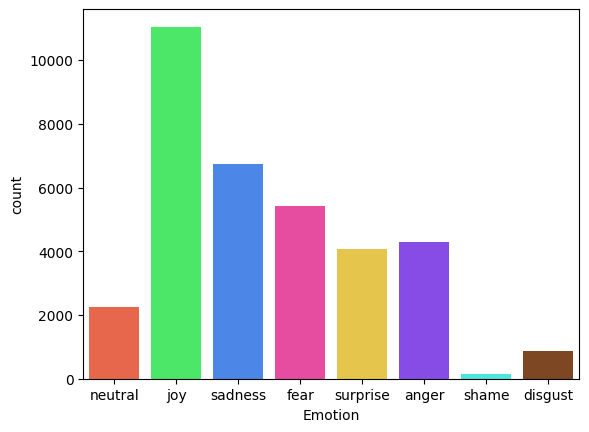

In [8]:
sns.countplot(x='Emotion', data=df, palette=['#FF5733', '#33FF57', '#3380FF', '#FF33A1', '#FFD433', '#8333FF', '#33FFF5', '#8B4513'])

In [9]:
df.dropna(inplace=True)

In [10]:
text=df["Clean_Text"]
label=df["Emotion"]

TRAIN TEST SPLIT 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(text,label,test_size=0.2,random_state=42)

In [12]:
pipeline = make_pipeline(CountVectorizer(), MultinomialNB())
param_grid = {"countvectorizer__analyzer": ["word"],"multinomialnb__alpha": [0.1, 0.5, 1.0, 1.5, 2.0]  }

In [13]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(text,label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__analyzer': ['word'],
                         'multinomialnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [14]:
best_model = grid_search.best_estimator_

In [15]:
y_pred = best_model.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.7757063792601223


In [17]:
precision = precision_score(y_test, y_pred,average='macro')
print(f"Precision: {precision:}")

Precision: 0.8531131739502499


In [18]:
recall = recall_score(y_test, y_pred,average='micro')
print(f"Recall: {recall:}")

Recall: 0.7757063792601223


In [19]:
f1_score = f1_score(y_test, y_pred,average='micro')
print(f"F1_score: {f1_score:}")

F1_score: 0.7757063792601223


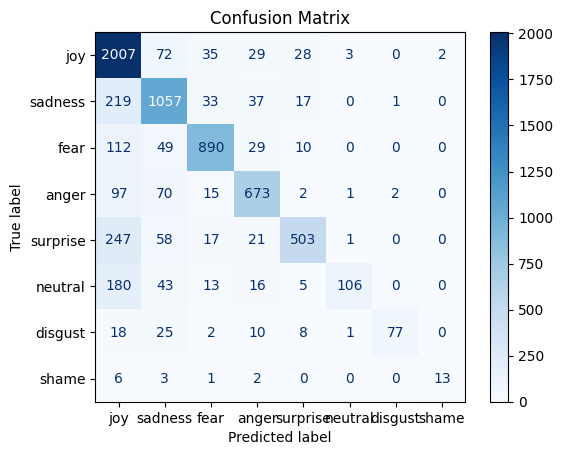

In [20]:
cm = confusion_matrix(y_test,y_pred, labels=["joy","sadness","fear","anger","surprise","neutral","disgust","shame"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["joy","sadness","fear","anger","surprise","neutral","disgust","shame"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [21]:
text=" OK . Bye ! "
clean_text = nfx.remove_userhandles(text)
clean_text = nfx.remove_stopwords(clean_text)
clean_text = nfx.remove_special_characters(clean_text)
clean_text = nfx.remove_multiple_spaces(clean_text)
prediction=best_model.predict([clean_text])
print(prediction)

['neutral']


In [22]:
joblib.dump(best_model,"model.pkl")

['model.pkl']